In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import sys
import os

In [10]:
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..", "MIMIC_CXR_EMB")))

In [11]:
from MIMIC_CXR_EMB.config_MIMIC import get_diseases, get_diseases_abbr

In [12]:
plt.rcParams['pdf.fonttype']=42 #ensures true fonte types are embedded in the pdf 
plt.rcParams['ps.fonttype']=42 # Applies the same setting for post script output

In [13]:
number_of_runs=5
significance_level=1.96 # for 95% ci
height = 6
font_size=11
rotation_degree =15

In [14]:
seed_19_sex = pd.read_csv("./FNR_GAPS/Run_seed19_FNR_GAP_sex.csv",index_col=0)
seed_31_sex = pd.read_csv("./FNR_GAPS/Run_seed31_FNR_GAP_sex.csv",index_col=0)
seed_38_sex = pd.read_csv("./FNR_GAPS/Run_seed38_FNR_GAP_sex.csv",index_col=0)
seed_47_sex = pd.read_csv("./FNR_GAPS/Run_seed47_FNR_GAP_sex.csv",index_col=0)
seed_77_sex = pd.read_csv("./FNR_GAPS/Run_seed77_FNR_GAP_sex.csv",index_col=0)
seed_77_sex.head(5)

,#M,FNR_M,Gap_M,#F,FNR_F,Gap_F
diseases,,,,,,
Enlarged Cardiomediastinum,7378,0.087,-0.021801,5067,0.109,0.021801
Cardiomegaly,6285,0.098,-0.023391,4231,0.122,0.023391
Lung Opacity,7732,0.099,-0.018575,5344,0.118,0.018575
Lung Lesion,1638,0.420,-0.012155,1069,0.432,0.012155
Edema,4812,0.131,-0.028918,3299,0.160,0.028918


In [15]:
seed_19_age = pd.read_csv("./FNR_GAPS/Run_seed19_FNR_GAP_Age.csv",index_col=0)
seed_31_age = pd.read_csv("./FNR_GAPS/Run_seed31_FNR_GAP_Age.csv",index_col=0)
seed_38_age = pd.read_csv("./FNR_GAPS/Run_seed38_FNR_GAP_Age.csv",index_col=0)
seed_47_age = pd.read_csv("./FNR_GAPS/Run_seed47_FNR_GAP_Age.csv",index_col=0)
seed_77_age = pd.read_csv("./FNR_GAPS/Run_seed77_FNR_GAP_Age.csv",index_col=0)
seed_77_age.head(5)

,#60-80,FNR_60-80,Gap_60-80,#40-60,FNR_40-60,Gap_40-60,#20-40,FNR_20-40,Gap_20-40,#80-,FNR_80-,Gap_80-,#0-20,FNR_0-20,Gap_0-20
diseases,,,,,,,,,,,,,,,
Enlarged Cardiomediastinum,5131,0.091,-0.015349,3441,0.106,0.000000,1194,0.116,0.010051,2600,0.079,-0.027134,79,0.152,0.045534
Cardiomegaly,4359,0.104,0.000000,2857,0.124,0.019404,938,0.126,0.021647,2294,0.088,-0.016532,68,0.103,-0.001211
Lung Opacity,5407,0.093,-0.022195,3694,0.116,0.000000,1353,0.138,0.022619,2535,0.103,-0.012634,87,0.149,0.033832
Lung Lesion,1104,0.405,-0.042548,780,0.449,0.001279,429,0.410,-0.037183,371,0.447,0.000000,23,0.478,0.030822
Edema,3378,0.137,-0.008259,2166,0.156,0.010429,776,0.146,0.000000,1740,0.133,-0.012285,51,0.235,0.089676


In [16]:
seed_19_race = pd.read_csv("./FNR_GAPS/Run_seed19_FNR_GAP_race.csv",index_col=0)
seed_31_race = pd.read_csv("./FNR_GAPS/Run_seed31_FNR_GAP_race.csv",index_col=0)
seed_38_race = pd.read_csv("./FNR_GAPS/Run_seed38_FNR_GAP_race.csv",index_col=0)
seed_47_race = pd.read_csv("./FNR_GAPS/Run_seed47_FNR_GAP_race.csv",index_col=0)
seed_77_race = pd.read_csv("./FNR_GAPS/Run_seed77_FNR_GAP_race.csv",index_col=0)
seed_77_race.head(3)

,#White,FNR_White,Gap_White,#Black,FNR_Black,Gap_Black,#Hisp,FNR_Hisp,Gap_Hisp,#Other,FNR_Other,Gap_Other,#Asian,FNR_Asian,Gap_Asian,#American,FNR_American,Gap_American
diseases,,,,,,,,,,,,,,,,,,
Enlarged Cardiomediastinum,8075,0.095,0.000949,798,0.122,0.027890,338,0.062,-0.031534,1701,0.090,-0.003717,1359,0.093,-0.000949,174,0.167,0.073003
Cardiomegaly,6800,0.105,-0.004803,705,0.136,0.026368,281,0.085,-0.024393,1431,0.115,0.004803,1155,0.095,-0.014564,144,0.174,0.063809
Lung Opacity,8514,0.103,-0.001966,809,0.157,0.052364,348,0.092,-0.012666,1766,0.104,-0.000430,1485,0.105,0.000430,154,0.130,0.025250


In [17]:
diseases=get_diseases()

diseases = [disease for disease in diseases if disease != 'No Finding']

diseases_abbr =get_diseases_abbr()


## 1. Gender

In [18]:
sex_dataframes = [seed_19_sex, seed_31_sex, seed_38_sex, seed_47_sex, seed_77_sex]
result_sex = pd.concat(sex_dataframes)

In [19]:
result_sex_grouped =result_sex.groupby("diseases")
result_sex_grouped_Stat = result_sex_grouped.describe()

In [20]:
result_sex_grouped_Stat

#M                                               \
                           count    mean  std     min     25%     50%     75%   
diseases                                                                        
Atelectasis                  5.0  6348.0  0.0  6348.0  6348.0  6348.0  6348.0   
Cardiomegaly                 5.0  6285.0  0.0  6285.0  6285.0  6285.0  6285.0   
Consolidation                5.0  5380.0  0.0  5380.0  5380.0  5380.0  5380.0   
Edema                        5.0  4812.0  0.0  4812.0  4812.0  4812.0  4812.0   
Enlarged Cardiomediastinum   5.0  7378.0  0.0  7378.0  7378.0  7378.0  7378.0   
Fracture                     5.0  3161.0  0.0  3161.0  3161.0  3161.0  3161.0   
Lung Lesion                  5.0  1638.0  0.0  1638.0  1638.0  1638.0  1638.0   
Lung Opacity                 5.0  7732.0  0.0  7732.0  7732.0  7732.0  7732.0   
No Finding                   5.0  1868.0  0.0  1868.0  1868.0  1868.0  1868.0   
Pleural Effusion             5.0  5286.0  0.0  5286.0  5286.0  5286.0  5286.0   
Pleural Other                5.0  1392.0  0.0  1392.0  1392.0  1392.0  1392.0   
Pneumonia                    5.0  2705.0  0.0  2705.0  2705.0  2705.0  2705.0   
Pneumothorax                 5.0  1229.0  0.0  1229.0  1229.0  1229.0  1229.0   
Support Devices              5.0  6975.0  0.0  6975.0  6975.0  6975.0  6975.0   

                                   FNR_M          ...  FNR_F        Gap_F  \
                               max count    mean  ...    75%    max count   
diseases                                          ...                       
Atelectasis                 6348.0   5.0  0.1240  ...  0.136  0.142   5.0   
Cardiomegaly                6285.0   5.0  0.1018  ...  0.123  0.124   5.0   
Consolidation               5380.0   5.0  0.1340  ...  0.135  0.135   5.0   
Edema                       4812.0   5.0  0.1456  ...  0.174  0.189   5.0   
Enlarged Cardiomediastinum  7378.0   5.0  0.0870  ...  0.109  0.110   5.0   
Fracture                    3161.0   5.0  0.2778  ...  0.292  0.293   5.0   
Lung Lesion                 1638.0   5.0  0.4034  ...  0.432  0.432   5.0   
Lung Opacity                7732.0   5.0  0.0898  ...  0.118  0.118   5.0   
No Finding                  1868.0   5.0  0.1934  ...  0.214  0.215   5.0   
Pleural Effusion            5286.0   5.0  0.1426  ...  0.153  0.153   5.0   
Pleural Other               1392.0   5.0  0.3832  ...  0.415  0.458   5.0   
Pneumonia                   2705.0   5.0  0.3384  ...  0.342  0.362   5.0   
Pneumothorax                1229.0   5.0  0.4506  ...  0.439  0.476   5.0   
Support Devices             6975.0   5.0  0.0742  ...  0.082  0.082   5.0   

                                                                              \
                                mean       std       min       25%       50%   
diseases                                                                       
Atelectasis                 0.010909  0.003563  0.005978  0.008956  0.012134   
Cardiomegaly                0.020346  0.002848  0.017327  0.018623  0.019000   
Consolidation              -0.004591  0.004144 -0.009646 -0.008129 -0.003727   
Edema                       0.024700  0.004235  0.019076  0.022763  0.023824   
Enlarged Cardiomediastinum  0.019694  0.002148  0.016875  0.018427  0.019568   
Fracture                   -0.009925  0.009461 -0.017809 -0.012841 -0.012841   
Lung Lesion                 0.007929  0.006034  0.001225  0.001422  0.012155   
Lung Opacity                0.017602  0.003692  0.013132  0.015025  0.018575   
No Finding                  0.008413  0.008955 -0.002312  0.004455  0.004455   
Pleural Effusion            0.001676  0.004761 -0.003567 -0.000050 -0.000050   
Pleural Other               0.023996  0.007626  0.019795  0.019795  0.020369   
Pneumonia                  -0.000422  0.007880 -0.005170 -0.004695 -0.004695   
Pneumothorax               -0.019508  0.010103 -0.029728 -0.029728 -0.016468   
Support Devices             0.000693  0.002334 -0.001900 -0.00

In [21]:
sex_df_male_mean = result_sex_grouped_Stat['#M']['mean']

sex_df_male_gap = result_sex_grouped_Stat['Gap_M']["mean"]
sex_df_male_ci = significance_level * result_sex_grouped_Stat['Gap_M']["std"] / np.sqrt(number_of_runs)

sex_df_female_mean = result_sex_grouped_Stat['#F']['mean']
sex_df_female_gap = result_sex_grouped_Stat['Gap_F']["mean"]
sex_df_female_ci = significance_level * result_sex_grouped_Stat['Gap_F']["std"] / np.sqrt(number_of_runs)


In [22]:
#Want = pd.DataFrame(pd.DataFrame(diseases, columns=["diseases"]))
percent_male_list = []
ci_male_list = []
gap_male_mean_list = []

diseases_abbr_list = []
distance_list = []

percent_female_list = []
ci_female_list = []
percent_female_list = []
gap_femal_mean_list = []

In [23]:
for disease in diseases:
  
  percent_male_list.append(sex_df_male_mean[disease])
  gap_male_mean_list.append(sex_df_male_gap[disease])
  ci_male_list.append(sex_df_male_ci[disease])

  percent_female_list.append(sex_df_female_mean[disease])
  gap_femal_mean_list.append(sex_df_female_gap[disease])
  ci_female_list.append(sex_df_female_ci[disease])

  distance_list.append(np.absolute(sex_df_female_gap[disease] - sex_df_male_gap[disease]))
  diseases_abbr_list.append(diseases_abbr[disease])

d = {'diseases': diseases, 'diseases_abbr': diseases_abbr_list, 'Distance': distance_list,
     "#M": percent_male_list, 'Gap_M_mean': gap_male_mean_list, 'CI_M': ci_male_list,
     "#F": percent_female_list, 'Gap_F_mean': gap_femal_mean_list, 'CI_F': ci_female_list
     }

sex_tpr_disp_df = pd.DataFrame(d)
sex_tpr_disp_df = sex_tpr_disp_df.sort_values(by ='Distance' )

In [24]:
sex_tpr_disp_df

,diseases,diseases_abbr,Distance,#M,Gap_M_mean,CI_M,#F,Gap_F_mean,CI_F
6,Pneumonia,Pneumonia,0.000845,2705.0,0.000422,0.006907,1925.0,-0.000422,0.006907
12,Support Devices,Sup. Devices,0.001386,6975.0,-0.000693,0.002046,4550.0,0.000693,0.002046
9,Pleural Effusion,Effusion,0.003353,5286.0,-0.001676,0.004173,3586.0,0.001676,0.004173
5,Consolidation,Consolidation,0.009182,5380.0,0.004591,0.003633,3767.0,-0.004591,0.003633
3,Lung Lesion,Lung Lesion,0.015857,1638.0,-0.007929,0.005289,1069.0,0.007929,0.005289
11,Fracture,Fracture,0.019850,3161.0,0.009925,0.008293,2282.0,-0.009925,0.008293
7,Atelectasis,Atelectasis,0.021818,6348.0,-0.010909,0.003123,4298.0,0.010909,0.003123
2,Lung Opacity,Air. Opacity,0.035203,7732.0,-0.017602,0.003236,5344.0,0.017602,0.003236
8,Pneumothorax,Pneumothorax,0.039017,1229.0,0.019508,0.008856,905.0,-0.019508,0.008856
0,Enlarged Cardiomediastinum,Enlarged Card.,0.039389,7378.0,-0.019694,0.001883,5067.0,0.019694,0.001883


In [25]:
sex_tpr_disp_df.to_csv("./FNR_GAPS/sex_fnr_disp.csv",index=False)

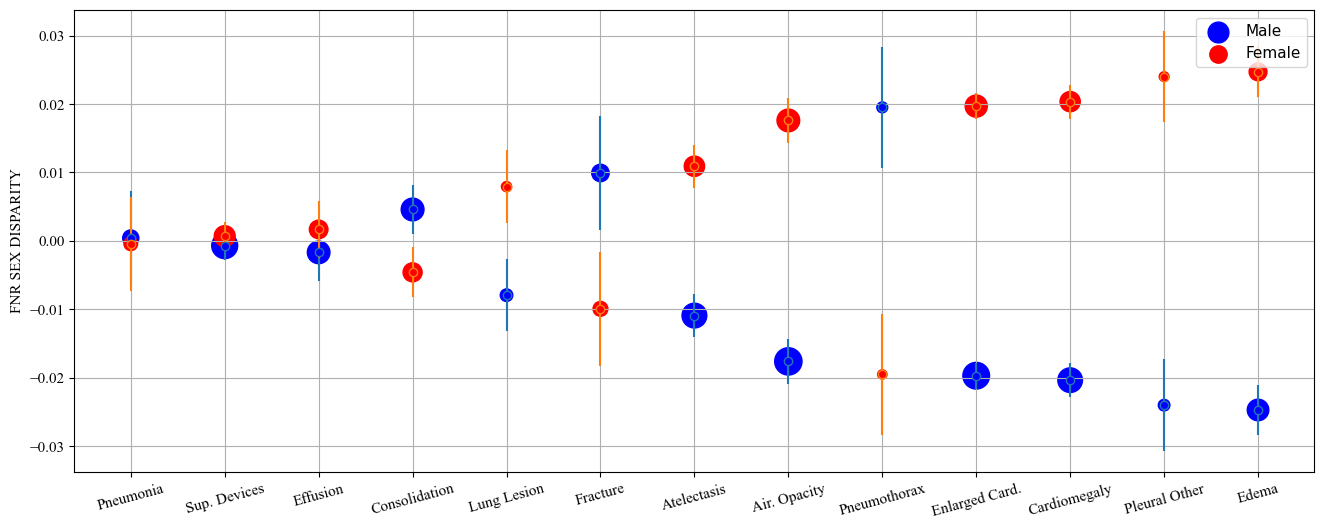

In [27]:

plt.rcParams.update({'font.size': font_size})

plt.figure(figsize=(16,height))
plt.scatter(sex_tpr_disp_df['diseases_abbr'],sex_tpr_disp_df['Gap_M_mean'],
            s= np.multiply(sex_tpr_disp_df['#M'],0.05), marker='o',color='blue', label="Male")
plt.errorbar(sex_tpr_disp_df['diseases_abbr'],sex_tpr_disp_df['Gap_M_mean'],
             yerr = sex_tpr_disp_df['CI_M'],fmt='o',mfc='blue')
plt.scatter(sex_tpr_disp_df['diseases_abbr'],sex_tpr_disp_df['Gap_F_mean'],
            s= np.multiply(sex_tpr_disp_df['#F'],0.05), marker='o',color='red', label="Female")
plt.errorbar(sex_tpr_disp_df['diseases_abbr'],sex_tpr_disp_df['Gap_F_mean'],
             yerr = sex_tpr_disp_df['CI_F'],fmt='o',mfc='red')

plt.xticks(rotation=rotation_degree,fontsize=font_size,fontname='Times New Roman')
plt.yticks(fontsize=font_size,fontname='Times New Roman')
plt.ylabel("FNR SEX DISPARITY",fontsize=font_size,fontname='Times New Roman')
plt.legend()
plt.grid(True)
plt.savefig("./FNR_GAPS/FNR_Dis_SEX.pdf")


## 2. Age

In [28]:
age_dataframes = [seed_19_age, seed_31_age, seed_38_age, seed_47_age, seed_77_age]
result_age_df= pd.concat(age_dataframes)

result_age_grouped =result_age_df.groupby("diseases")
result_age_grouped_stat = result_age_grouped.describe()


In [29]:
age_df_40_mean = result_age_grouped_stat['#40-60']['mean']
age_df_40_gap = result_age_grouped_stat['Gap_40-60']["mean"]
age_df_40_ci = significance_level*result_age_grouped_stat['Gap_40-60']["std"]/np.sqrt(number_of_runs)

In [30]:
age_df_60_mean = result_age_grouped_stat['#60-80']['mean']
age_df_60_gap = result_age_grouped_stat['Gap_60-80']["mean"]
age_df_60_ci = significance_level*result_age_grouped_stat['Gap_60-80']["std"]/np.sqrt(number_of_runs)

In [31]:
age_df_20_mean = result_age_grouped_stat['#20-40']['mean']
age_df_20_gap = result_age_grouped_stat['Gap_20-40']["mean"]
age_df_20_ci = significance_level*result_age_grouped_stat['Gap_20-40']["std"]/np.sqrt(number_of_runs)

In [32]:
age_df_80_mean = result_age_grouped_stat['#80-']['mean']
age_df_80_gap = result_age_grouped_stat['Gap_80-']["mean"]
age_df_80_ci = significance_level*result_age_grouped_stat['Gap_80-']["std"]/np.sqrt(number_of_runs)

In [33]:
age_df_0_mean = result_age_grouped_stat['#0-20']['mean']
age_df_0_gap = result_age_grouped_stat['Gap_0-20']["mean"]
age_df_0_ci = significance_level*result_age_grouped_stat['Gap_0-20']["std"]/np.sqrt(number_of_runs)

In [34]:
age_tpr_disp=pd.DataFrame(pd.DataFrame(diseases, columns=["diseases"]))

In [35]:
prcent_40_list = []
ci_40_list = []
gap_40_mean_list = []
diseases_abbr_list = []
distance_list = []

prcent_60_list = []
ci_60_list = []
prcent_60_list = []
gap_60_mean_list = []

prcent_20_list = []
ci_20_list = []
prcent_20_list = []
gap_20_mean_list = []

prcent_80_list = []
ci_80_list = []
prcent_80_list = []
gap_80_mean_list = []

prcent_0_list = []
ci_0_list = []
prcent_0_list = []
gap_0_mean_list = []
mean_list = []


In [36]:
for disease in diseases:
    mean_list = []
    cleaned_mean_gap_list = []
    prcent_40_list.append(age_df_40_mean[disease])
    gap_40_mean_list.append(age_df_40_gap[disease])
    ci_40_list.append(age_df_40_ci[disease])
    mean_list.append(age_df_40_gap[disease])

    prcent_60_list.append(age_df_60_mean[disease])
    gap_60_mean_list.append(age_df_60_gap[disease])
    ci_60_list.append(age_df_60_ci[disease])
    mean_list.append(age_df_60_gap[disease])

    prcent_20_list.append(age_df_20_mean[disease])
    gap_20_mean_list.append(age_df_20_gap[disease])
    ci_20_list.append(age_df_20_ci[disease])
    mean_list.append(age_df_20_gap[disease])

    prcent_80_list.append(age_df_80_mean[disease])
    gap_80_mean_list.append(age_df_80_gap[disease])
    ci_80_list.append(age_df_80_ci[disease])
    mean_list.append(age_df_80_gap[disease])

    prcent_0_list.append(age_df_0_mean[disease])
    gap_0_mean_list.append(age_df_0_gap[disease])
    ci_0_list.append(age_df_0_ci[disease])
    mean_list.append(age_df_0_gap[disease])


    cleaned_mean_gap_list = [x for x in mean_list if str(x) != 'nan']
    distance_list.append(np.max(cleaned_mean_gap_list) - np.min(cleaned_mean_gap_list))
    diseases_abbr_list.append(diseases_abbr[disease])

In [37]:
d = {'diseases': diseases, 'diseases_abbr': diseases_abbr_list, 'Distance': distance_list,
     "#40-60": prcent_40_list, 'Gap_40-60_mean': gap_40_mean_list, 'CI_40-60': ci_40_list,
     "#60-80": prcent_60_list, 'Gap_60-80_mean': gap_60_mean_list, 'CI_60-80': ci_60_list,
     "#20-40": prcent_20_list, 'Gap_20-40_mean': gap_20_mean_list, 'CI_20-40': ci_20_list,
     "#80-": prcent_80_list, 'Gap_80-_mean': gap_80_mean_list, 'CI_80-': ci_80_list,
     "#0-20": prcent_0_list, 'Gap_0-20_mean': gap_0_mean_list, 'CI_0-20': ci_0_list
     }
age_tpr_disp_df = pd.DataFrame(d)

In [38]:
age_tpr_disp_df = age_tpr_disp_df.sort_values(by ='Distance' )
age_tpr_disp_df.to_csv("./FNR_GAPS/age_tpr_disp.csv",index=False)

In [39]:
plt.rcParams.update({'font.size': font_size})

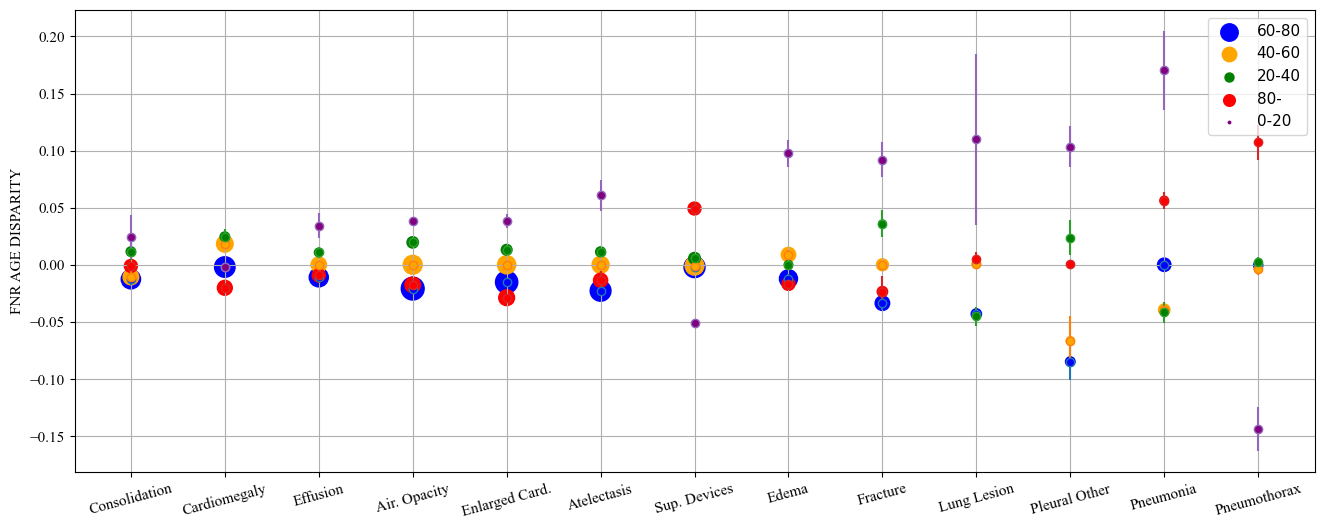

In [42]:
plt.figure(figsize=(16,height))
plt.scatter(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_60-80_mean'],
            s= np.multiply(age_tpr_disp_df['#60-80'],0.05), marker='o',color='blue', label="60-80")
plt.errorbar(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_60-80_mean'],
             yerr = age_tpr_disp_df['CI_60-80'],fmt='o',mfc='blue')
plt.scatter(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_40-60_mean'],
            s= np.multiply(age_tpr_disp_df['#40-60'],0.05), marker='o',color='orange', label="40-60")
plt.errorbar(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_40-60_mean'],
             yerr = age_tpr_disp_df['CI_40-60'],fmt='o',mfc='orange')
plt.scatter(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_20-40_mean'],
            s= np.multiply(age_tpr_disp_df['#20-40'],0.05), marker='o',color='green', label="20-40")
plt.errorbar(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_20-40_mean'],
             yerr = age_tpr_disp_df['CI_20-40'],fmt='o',mfc='green')
plt.scatter(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_80-_mean'],
            s= np.multiply(age_tpr_disp_df['#80-'],0.05), marker='o',color='red', label="80-")
plt.errorbar(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_80-_mean'],
             yerr = age_tpr_disp_df['CI_80-'],fmt='o',mfc='red')
plt.scatter(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_0-20_mean'],
            s= np.multiply(age_tpr_disp_df['#0-20'],0.05), marker='o',color='purple', label="0-20")
plt.errorbar(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_0-20_mean'],
             yerr = age_tpr_disp_df['CI_0-20'],fmt='o',mfc='purple')


plt.xticks(rotation = rotation_degree,fontsize=font_size,fontname='Times New Roman')
plt.ylabel("FNR AGE DISPARITY",fontsize=font_size,fontname='Times New Roman')
plt.yticks(fontsize=font_size,fontname='Times New Roman')
plt.legend()
plt.grid(True)
plt.savefig("./FNR_GAPS/TPR_Dis_AGE.pdf")

## 3. Race

In [43]:
race_dataframes = [seed_19_race, seed_31_race, seed_38_race, seed_47_race, seed_77_race]
result_race_df= pd.concat(race_dataframes)

result_race_grouped =result_race_df.groupby("diseases")
result_race_grouped_stat = result_race_grouped.describe()

In [44]:
result_race_grouped_stat

#White                                       \
                            count    mean  std     min     25%     50%   
diseases                                                                 
Atelectasis                   5.0  7016.0  0.0  7016.0  7016.0  7016.0   
Cardiomegaly                  5.0  6800.0  0.0  6800.0  6800.0  6800.0   
Consolidation                 5.0  6072.0  0.0  6072.0  6072.0  6072.0   
Edema                         5.0  5259.0  0.0  5259.0  5259.0  5259.0   
Enlarged Cardiomediastinum    5.0  8075.0  0.0  8075.0  8075.0  8075.0   
Fracture                      5.0  3545.0  0.0  3545.0  3545.0  3545.0   
Lung Lesion                   5.0  1743.0  0.0  1743.0  1743.0  1743.0   
Lung Opacity                  5.0  8514.0  0.0  8514.0  8514.0  8514.0   
No Finding                    5.0  1888.0  0.0  1888.0  1888.0  1888.0   
Pleural Effusion              5.0  5883.0  0.0  5883.0  5883.0  5883.0   
Pleural Other                 5.0  1475.0  0.0  1475.0  1475.0  1475.0   
Pneumonia                     5.0  2972.0  0.0  2972.0  2972.0  2972.0   
Pneumothorax                  5.0  1531.0  0.0  1531.0  1531.0  1531.0   
Support Devices               5.0  7702.0  0.0  7702.0  7702.0  7702.0   

                                           FNR_White          ...  \
                               75%     max     count    mean  ...   
diseases                                                      ...   
Atelectasis                 7016.0  7016.0       5.0  0.1188  ...   
Cardiomegaly                6800.0  6800.0       5.0  0.1070  ...   
Consolidation               6072.0  6072.0       5.0  0.1290  ...   
Edema                       5259.0  5259.0       5.0  0.1504  ...   
Enlarged Cardiomediastinum  8075.0  8075.0       5.0  0.0940  ...   
Fracture                    3545.0  3545.0       5.0  0.2726  ...   
Lung Lesion                 1743.0  1743.0       5.0  0.4110  ...   
Lung Opacity                8514.0  8514.0       5.0  0.0938  ...   
No Finding                  1888.0  1888.0       5.0  0.2220  ...   
Pleural Effusion            5883.0  5883.0       5.0  0.1340  ...   
Pleural Other               1475.0  1475.0       5.0  0.4046  ...   
Pneumonia                   2972.0  2972.0       5.0  0.3556  ...   
Pneumothorax                1531.0  1531.0       5.0  0.4286  ...   
Support Devices             7702.0  7702.0       5.0  0.0720  ...   

                           FNR_American        Gap_American            \
                                    75%    max        count      mean   
diseases                                                                
Atelectasis                       0.198  0.216          5.0  0.060160   
Cardiomegaly                      0.181  0.194          5.0  0.062827   
Consolidation                     0.188  0.219          5.0  0.065858   
Edema                             0.214  0.223          5.0  0.020250   
Enlarged Cardiomediastinum        0.167  0.167          5.0  0.065281   
Fracture                          0.413  0.413          5.0  0.092962   
Lung Lesion                       0.415  0.439          5.0  0.003763   
Lung Opacity                      0.130  0.136          5.0  0.025522   
No Finding                        0.145  0.158          5.0 -0.012912   
Pleural Effusion                  0.233  0.233          5.0  0.057384   
Pleural Other                     0.439  0.488          5.0  0.006749   
Pneumonia                         0.424  0.439          5.0  0.025007   
Pneumothorax                      0.500  0.562          5.0 -0.006913   
Support Devices                   0.095  0.095          5.0  0.007484   

                                                                              \
                                 std       min       25%       50%       75%   
diseases                                                                       
Atelectasis                 0.005750  0.054828  0.054828  0.060270  0.062302   
Cardiomegaly                0.01

In [45]:
race_tpr_disp=pd.DataFrame(pd.DataFrame(diseases, columns=["diseases"]))

In [46]:
race_df_white_mean = result_race_grouped_stat['#White']['mean']
race_df_white_gap = result_race_grouped_stat['Gap_White']["mean"]
race_df_white_ci= significance_level * result_race_grouped_stat['Gap_White']["std"] / np.sqrt(number_of_runs)

In [47]:
race_df_black_mean = result_race_grouped_stat['#Black']['mean']
race_df_black_gap = result_race_grouped_stat['Gap_Black']["mean"]
race_df_black_ci= significance_level * result_race_grouped_stat['Gap_Black']["std"] / np.sqrt(number_of_runs)

In [48]:
race_df_hisp_mean = result_race_grouped_stat['#Hisp']['mean']
race_df_hisp_gap = result_race_grouped_stat['Gap_Hisp']["mean"]
race_df_hisp_ci= significance_level * result_race_grouped_stat['Gap_Hisp']["std"] / np.sqrt(number_of_runs)


In [49]:
race_df_other_mean = result_race_grouped_stat['#Other']['mean']
race_df_other_gap = result_race_grouped_stat['Gap_Other']["mean"]
race_df_other_ci= significance_level * result_race_grouped_stat['Gap_Other']["std"] / np.sqrt(number_of_runs)


In [50]:
race_df_asian_mean = result_race_grouped_stat['#Asian']['mean']
race_df_asian_gap = result_race_grouped_stat['Gap_Asian']["mean"]
race_df_asian_ci= significance_level * result_race_grouped_stat['Gap_Asian']["std"] / np.sqrt(number_of_runs)

In [51]:
race_df_american_mean = result_race_grouped_stat['#American']['mean']
race_df_american_gap = result_race_grouped_stat['Gap_American']["mean"]
race_df_american_ci= significance_level * result_race_grouped_stat['Gap_American']["std"] / np.sqrt(number_of_runs)


In [52]:
percent_asian_list = []
ci_asian_list = []
gap_asian_mean_list = []


ci_american_list = []
percent_american_list = []
gap_american_mean_list = []

percent_white_list = []
ci_white_list = []
gap_white_mean_list = []

percent_black_list = []
ci_black_list = []
gap_black_mean_list = []

percent_hisp_list = []
ci_hisp_list = []
gap_hisp_mean_list = []

percent_other_list = []
ci_other_list = []
gap_other_mean_list = []

diseases_abbr_list = []
distance_list = []


In [53]:
for disease in diseases:
    mean_list = []
    percent_black_list.append(race_df_black_mean[disease])
    gap_black_mean_list.append(race_df_black_gap[disease])
    ci_black_list.append(race_df_black_ci[disease])
    mean_list.append(race_df_black_gap[disease])

    percent_hisp_list.append(race_df_hisp_mean[disease])
    gap_hisp_mean_list.append(race_df_hisp_gap[disease])
    ci_hisp_list.append(race_df_hisp_ci[disease])
    mean_list.append(race_df_hisp_gap[disease])

    percent_other_list.append(race_df_other_mean[disease])
    gap_other_mean_list.append(race_df_other_gap[disease])
    ci_other_list.append(race_df_other_ci[disease])
    mean_list.append(race_df_other_gap[disease])

    percent_white_list.append(race_df_white_mean[disease])
    gap_white_mean_list.append(race_df_white_gap[disease])
    ci_white_list.append(race_df_white_ci[disease])
    mean_list.append(race_df_white_gap[disease])

    percent_asian_list.append(race_df_asian_mean[disease])
    gap_asian_mean_list.append(race_df_asian_gap[disease])
    ci_asian_list.append(race_df_asian_ci[disease])
    mean_list.append(race_df_asian_gap[disease])

    percent_american_list.append(race_df_american_mean[disease])
    gap_american_mean_list.append(race_df_american_gap[disease])
    ci_american_list.append(race_df_american_ci[disease])
    mean_list.append(race_df_american_gap[disease])

    cleaned_mean_list= [x for x in mean_list if str(x) != 'nan']

    distance_list.append(np.max(cleaned_mean_list) - np.min(cleaned_mean_list))

    diseases_abbr_list.append(diseases_abbr[disease])

In [54]:
d = {'diseases': diseases, 'diseases_abbr': diseases_abbr_list, 'Distance': distance_list,
     "#White": percent_white_list, 'Gap_W_mean': gap_white_mean_list, 'CI_W': ci_white_list,
     "#Black": percent_white_list, 'Gap_B_mean': gap_black_mean_list, 'CI_B': ci_black_list,
     "#Hisp": percent_hisp_list, 'Gap_H_mean': gap_hisp_mean_list, 'CI_H': ci_hisp_list,
     "#Other": percent_other_list, 'Gap_Ot_mean': gap_other_mean_list, 'CI_Ot': ci_other_list,
     "#Asian": percent_asian_list, 'Gap_As_mean': gap_asian_mean_list, 'CI_As': ci_asian_list,
     "#American": percent_american_list, 'Gap_Am_mean': gap_american_mean_list, 'CI_Am': ci_american_list
     }
race_tpr_disp_df = pd.DataFrame(d)
race_tpr_disp_df = race_tpr_disp_df.sort_values(by ='Distance')
race_tpr_disp_df.to_csv("./FNR_GAPS/race_tpr_disp.csv",index=False)

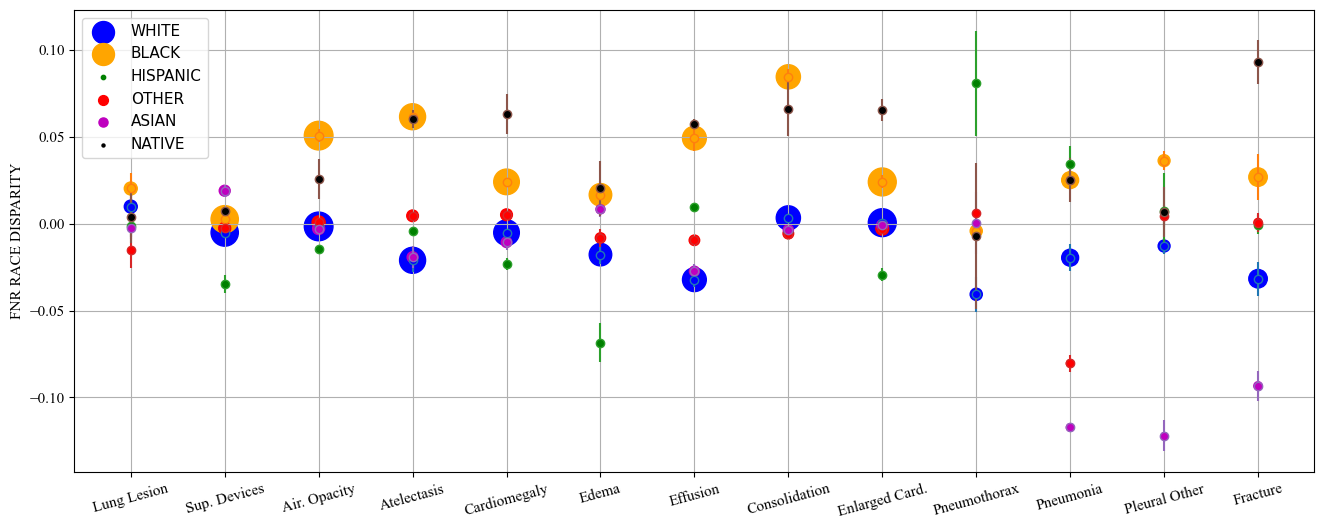

In [56]:
plt.rcParams.update({'font.size': font_size})
plt.figure(figsize=(16,height))

plt.scatter(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_W_mean'],
            s= np.multiply(race_tpr_disp_df['#White'],0.05), marker='o',color='blue', label="WHITE")
plt.errorbar(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_W_mean'],
             yerr = race_tpr_disp_df['CI_W'],fmt='o',mfc='blue')#ecolor='blue'

plt.scatter(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_B_mean'],
            s= np.multiply(race_tpr_disp_df['#Black'],0.05), marker='o',color='orange', label="BLACK")
plt.errorbar(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_B_mean'],
             yerr = race_tpr_disp_df['CI_B'],fmt='o',mfc='orange')

plt.scatter(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_H_mean'],
            s= np.multiply(race_tpr_disp_df['#Hisp'],0.05), marker='o',color='green', label="HISPANIC")
plt.errorbar(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_H_mean'],
             yerr = race_tpr_disp_df['CI_H'],fmt='o',mfc='green')

plt.scatter(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_Ot_mean'],
            s= np.multiply(race_tpr_disp_df['#Other'],0.05), marker='o',color='r', label="OTHER")
plt.errorbar(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_Ot_mean'],
             yerr = race_tpr_disp_df['CI_Ot'],fmt='o',mfc='r')

plt.scatter(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_As_mean'],
            s= np.multiply(race_tpr_disp_df['#Asian'],0.05), marker='o',color='m', label="ASIAN")
plt.errorbar(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_As_mean']
             ,yerr = race_tpr_disp_df['CI_As'],fmt='o',mfc='m')

plt.scatter(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_Am_mean'],
            s= np.multiply(race_tpr_disp_df['#American'],0.05), marker='o',color='k', label="NATIVE")
plt.errorbar(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_Am_mean'],
             yerr = race_tpr_disp_df['CI_Am'],fmt='o',mfc='k')

plt.xticks(rotation=rotation_degree,fontsize=font_size,fontname='Times New Roman')
plt.ylabel("FNR RACE DISPARITY",fontsize=font_size,fontname='Times New Roman')
plt.yticks(fontsize=font_size,fontname='Times New Roman')
plt.legend()
plt.grid(True)
plt.savefig("./FNR_GAPS/TPR_Dis_RACE.pdf")